# **Linear, polynomial, splines and Fourier regression on nonlinear data**
Quistian Navarro Juan Luis \
A341807@alumnos.uaslp.mx \
Ing. Sistemas Inteligentes, Gen 2021 \
Machine Learning, Group 281601

### 02/12/24

### **Abstract**

En este cuaderno, nos adentramos en un análisis exhaustivo de los modelos de regresión a través de dos actividades distintas. Nuestra exploración se centra en comparar el rendimiento de varios modelos de regresión utilizando un conjunto de datos que incluye datos reales (DS-5-1-GAP-0-1-N-0_v2) junto con datos de ruido de DS-5-1-GAP-1-1-N-1_v2 y DS-5-1-GAP-5-1-N-3_v2.

La primera actividad se centra en la utilización de una única realización para el entrenamiento, mientras que la segunda actividad amplía esta posibilidad empleando 100 realizaciones. Nuestros criterios de evaluación son multifacéticos, incorporando métricas como el Error Cuadrático Medio (ECM) tanto para la fase de entrenamiento como para la de prueba en la actividad inicial. Además, en la segunda actividad, aumentamos nuestra evaluación para abarcar consideraciones de sesgo y varianza, proporcionando así una comprensión más completa del rendimiento del modelo en condiciones variables. A través de este análisis comparativo, pretendemos ofrecer información sobre la eficacia y solidez de diferentes modelos de regresión, ayudando así a tomar decisiones informadas en aplicaciones del mundo real.



In [814]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from scipy import fftpack

In [815]:
# dataset phat

DATA_PHAT = '../dataset/'
DATA_PATH_TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
DATA_PATH_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'

In [816]:
df_true = pd.read_csv(DATA_PHAT + DATA_PATH_TRUE, header=None)
df_noise1 = pd.read_csv(DATA_PHAT + DATA_PATH_NOISE1,header=None)
df_noise2 = pd.read_csv(DATA_PHAT + DATA_PATH_NOISE2,header=None)

In [817]:
df_true.head(5)

,0,1,2
0,0.00,17.49,17.04
1,2.12,17.65,17.17
2,3.06,17.70,17.24
3,4.16,17.73,17.33
4,4.93,17.75,17.39


In [818]:
df_noise1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.00,17.49,17.50,17.49,17.49,17.50,17.49,17.50,17.49,17.49,...,17.04,17.04,17.05,17.04,17.03,17.04,17.04,17.04,17.03,17.04
1,2.12,17.65,17.65,17.64,17.64,17.65,17.65,17.65,17.64,17.65,...,17.16,17.17,17.18,17.18,17.18,17.17,17.17,17.18,17.18,17.18
2,3.06,17.69,17.70,17.70,17.69,17.69,17.70,17.69,17.69,17.70,...,17.25,17.24,17.24,17.24,17.25,17.24,17.24,17.24,17.25,17.25
3,4.16,17.74,17.73,17.74,17.73,17.74,17.74,17.74,17.74,17.73,...,17.33,17.32,17.33,17.33,17.33,17.32,17.33,17.33,17.32,17.32
4,4.93,17.75,17.74,17.73,17.74,17.74,17.75,17.75,17.75,17.74,...,17.38,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39


In [819]:
df_noise2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.00,17.61,17.55,17.48,17.46,17.43,17.53,17.35,17.66,17.60,...,17.16,17.03,17.12,17.04,17.03,16.98,17.24,16.97,17.09,17.05
1,2.12,17.71,17.55,17.70,17.52,17.67,17.62,17.76,17.73,17.63,...,17.24,17.17,17.24,16.95,17.17,17.19,17.14,17.18,17.17,16.97
2,3.06,17.68,17.77,17.61,17.72,17.73,17.78,17.80,17.81,17.68,...,17.42,17.27,17.22,17.31,17.31,17.20,17.19,17.22,17.29,17.26
3,4.16,17.62,17.72,17.66,17.69,17.75,17.65,17.82,17.78,17.86,...,17.32,17.28,17.25,17.45,17.37,17.37,17.47,17.34,17.33,17.56
4,4.93,17.80,17.54,17.66,17.71,17.82,17.69,17.70,17.81,17.82,...,17.33,17.46,17.39,17.52,17.40,17.38,17.42,17.31,17.38,17.38


## **ACtivity 1: Use only one realization for training.**

MSE on training data (DS-5-1-GAP-1-1-N-1_v2.dat and DS-5-1-GAP-5-1-N-3_v2.dat) and MSE on testing data (ground truth: DS-5-1-GAP-0-1-N-0_v2.dat)

#### **DS-5-1-GAP-1-1-N-1_v2.csv**

In [820]:
# Load data
X_test = df_true[0].to_numpy()
Y_test = df_true[1].to_numpy()

X_train = df_noise1[0].to_numpy()
Y_train = df_noise1[1].to_numpy()


print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

(50,)
(50,)
(45,)
(45,)


#### **Linear regression**

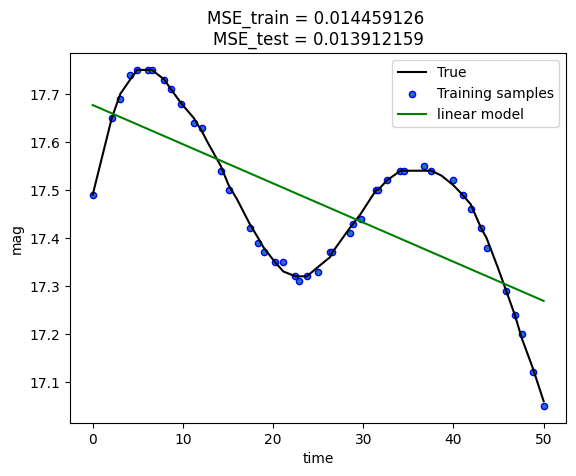

MSE_train:  0.014459125767049387
MSE_test:  0.013912158967729373


In [821]:
# Reshape X_train to a 2D array
X_train_reshaped = X_train[:, np.newaxis]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_reshaped, Y_train)

# Make predictions using the testing set
Y_pred_train = regr.predict(X_train[:,np.newaxis])
Y_pred_test = regr.predict(X_test[:,np.newaxis])


# The mean squared error
MSE_train = mean_squared_error(Y_train, Y_pred_train)
MSE_test = mean_squared_error(Y_test, Y_pred_test)



# Plot outputs
plt.plot(X_test,Y_test, color='k', label="True")
plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Training samples")
plt.plot(X_test, Y_pred_test, color='g', label="linear model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("MSE_train = {:.8} \nMSE_test = {:.8}".format(MSE_train,MSE_test))
plt.show()

print('MSE_train: ',MSE_train)
print('MSE_test: ',MSE_test)

#### **Polynomial Regression**

In [822]:
def get_best_degree_to_polynomial_model(X_train, Y_train, degrees):
    best_model = None
    best_degree = None
    best_y_pred_test = None
    best_MSE_test = float('inf')
    best_MSE_train = float('inf')
    MSE_list = []

    for degree in degrees:
        # create model
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        #Training
        model.fit(X_train[:,np.newaxis], Y_train[:,np.newaxis])  #get polynomial model for training data

        #Testing
         #predictios
        Y_pred_train = model.predict(X_train[:,np.newaxis])
        Y_pred_test = model.predict (X_test[:,np.newaxis])

        MSE_train = mean_squared_error(Y_train,Y_pred_train)
        MSE_test = mean_squared_error(Y_test,Y_pred_test)
        MSE_list.append(MSE_test)
        # Update the best model if a lower MSE is found.
        if MSE_test < best_MSE_test:
                best_y_pred_test = Y_pred_test
                best_y_pred_train = Y_pred_train
                best_MSE_train = MSE_train
                best_MSE_test = MSE_test
                best_degree = degree
                best_model = model
                

    return best_model, best_degree, best_MSE_test, best_MSE_train, best_y_pred_test, best_y_pred_train,MSE_list

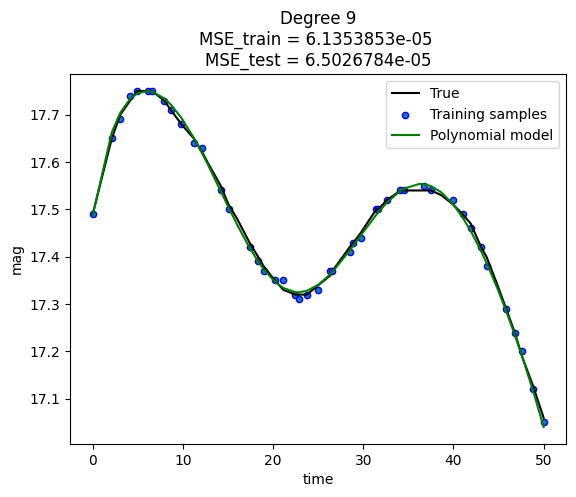

MSE_train:  6.135385293308886e-05
MSE_test:  6.502678411965206e-05


In [823]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'

degrees = list(range(1, 16))

best_model, best_degree, best_MSE_test, best_MSE_train, best_y_pred_test,best_y_pred_train,MSE_list_test = get_best_degree_to_polynomial_model(X_train, Y_train, degrees)

plt.plot(X_test, Y_test, color='k', label="True")
plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Training samples")
plt.plot(X_test, best_y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        best_degree, best_MSE_train, best_MSE_test))
plt.show()


print('MSE_train: ',best_MSE_train)
print('MSE_test: ',best_MSE_test)

<function matplotlib.pyplot.show(close=None, block=None)>

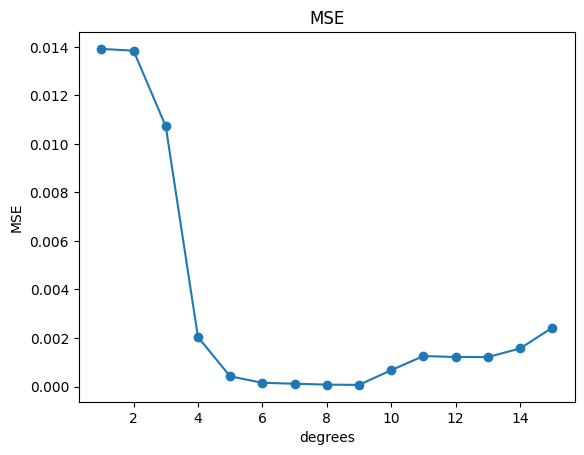

In [824]:
#plot all MSE
plt.plot(degrees, MSE_list_test, marker = 'o', linestyle= '-')
plt.xlabel('degrees')
plt.ylabel('MSE')
plt.title('MSE')
plt.show

#### **Splines (B-spline)**

In [825]:
def get_best_degree_to_spline_model(X_train, Y_train, degrees):
    best_model = None
    best_degree = None
    best_y_pred_test = None
    best_MSE_test = float('inf')
    best_MSE_train = float('inf')
    MSE_list = []

    for degree in degrees:
        #create model
        model = make_pipeline(SplineTransformer(n_knots=4, degree=degree), Ridge(alpha=1e-3))
        model.fit(X_train[:,np.newaxis], Y_train[:,np.newaxis])

        #predictios
        Y_pred_train = model.predict(X_train[:,np.newaxis])
        Y_pred_test = model.predict (X_test[:,np.newaxis])

        #MSE
        MSE_train = mean_squared_error(Y_train, Y_pred_train)
        MSE_test = mean_squared_error(Y_test, Y_pred_test)

        MSE_list.append(MSE_test)

        if MSE_test < best_MSE_test:
                best_y_pred_test = Y_pred_test
                best_y_pred_train = Y_pred_train
                best_MSE_train = MSE_train
                best_MSE_test = MSE_test
                best_degree = degree
                best_model = model
                
    return best_model, best_degree, best_MSE_test, best_MSE_train, best_y_pred_test, best_y_pred_train, MSE_list
        

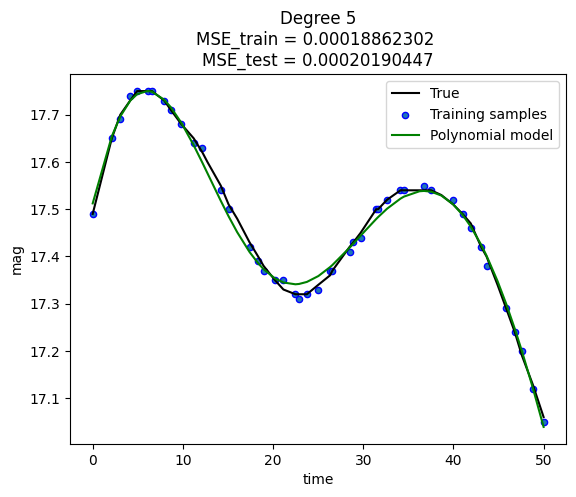

MSE_train:  0.00018862301525047556
MSE_test:  0.0002019044705403566


In [826]:
degrees = list(range(1, 16))

best_model, best_degree, best_MSE_test, best_MSE_train, best_y_pred_test, best_y_pred_train, MSE_list_test = get_best_degree_to_spline_model(X_train, Y_train, degrees)

# Plot outputs
plt.plot(X_test, Y_test, color='k', label="True")
plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Training samples")
plt.plot(X_test, best_y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        best_degree, best_MSE_train, best_MSE_test))
plt.show()


print('MSE_train: ',best_MSE_train)
print('MSE_test: ',best_MSE_test)

<function matplotlib.pyplot.show(close=None, block=None)>

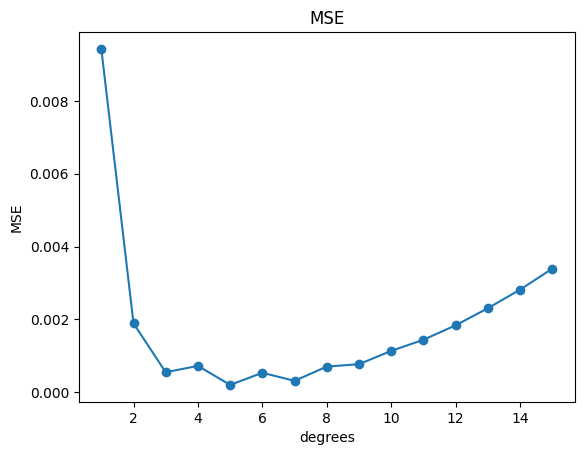

In [827]:
#plot all MSE
plt.plot(degrees, MSE_list_test, marker = 'o', linestyle= '-')
plt.xlabel('degrees')
plt.ylabel('MSE')
plt.title('MSE')
plt.show

#### **Fourier**

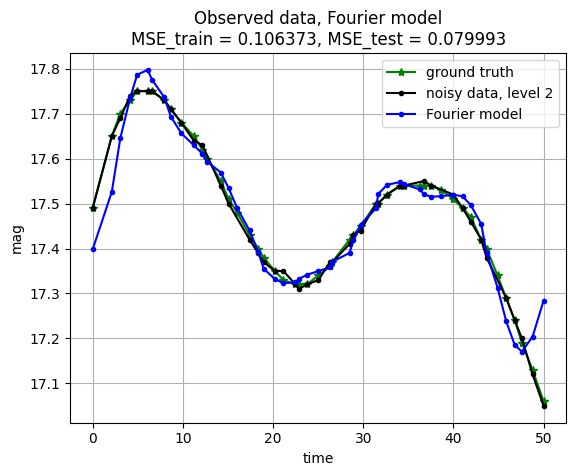

MSE for training set: 0.1063730967245483
MSE for testing set: 0.07999257348341401


In [828]:
# Normalize data
Y_train_normalized = (Y_train - np.mean(Y_train)) / np.std(Y_train)
Y_test_normalized = (Y_test - np.mean(Y_test)) / np.std(Y_test)

# Compute Fourier coefficients para los datos de entrenamiento normalizados
y_fft = np.fft.fft(Y_train_normalized)
freqs_train = np.fft.fftfreq(len(Y_train_normalized))

# Filter out high frequencies en los datos de entrenamiento
y_fft[np.abs(freqs_train) > 0.1] = 0

# Reconstruct signal usando inverse FFT para los datos de entrenamiento
f_train = np.fft.ifft(y_fft).real

# Calculate MSE para conjunto de entrenamiento
MSE_train = np.mean((f_train - Y_train_normalized) ** 2)

# Compute Fourier coefficients para los datos de prueba normalizados
y_test_fft = np.fft.fft(Y_test_normalized)
freqs_test = np.fft.fftfreq(len(Y_test_normalized))

# Filter out high frequencies en los datos de prueba usando las frecuencias de prueba
y_test_fft[np.abs(freqs_test) > 0.1] = 0

# Reconstruct signal usando inverse FFT para los datos de prueba
f_test = np.fft.ifft(y_test_fft).real

# Calculate MSE para conjunto de prueba
MSE_test = np.mean((f_test - Y_test_normalized) ** 2)

# Undo normalization of the reconstructed signal to training and test data
f_train = f_train * np.std(Y_train) + np.mean(Y_train)
f_test = f_test * np.std(Y_test) + np.mean(Y_test)

# MSE visualization and calculation
plt.figure()
plt.plot(X_test, Y_test, '*-g', label='ground truth')  # ground truth
plt.plot(X_train, Y_train, '.-k', label='noisy data, level 2')  # noisy data, level 3
plt.plot(X_test, f_test, '.-b', label='Fourier model')  # Fourier model
plt.legend()
plt.xlabel('time')
plt.ylabel('mag')
plt.title('Observed data, Fourier model\nMSE_train = {:f}, MSE_test = {:f}'.format(MSE_train.real, MSE_test.real))
plt.grid(True)
plt.show()

# Printing the MSE values
print("MSE for training set:", MSE_train.real)
print("MSE for testing set:", MSE_test.real)


### **Table: Dataset: DS-5-1-GAP-1-1-N-1**
| Regression                | MSE training          | MSE Testing (ground truth) |
|---------------------------|-----------------------|----------------------------|
| Linear                    |0.014459126            |0.013912158967729373        |
| Polynomial (degree = 9)   |6.135385293308886e-05  |6.502678411965206e-05       | 
| Splines (degree = 5)      |0.00018862301525047556 |0.0002019044705403566       |
| Fourier                   |0.1063730967245483     |0.0799925734834140          |


# **Data: DS-5-1-GAP-5-1-N-3_v2.csv**

In [829]:
# Load data
X_test = df_true[0].to_numpy()
Y_test = df_true[1].to_numpy()

X_train = df_noise2[0].to_numpy()
Y_train = df_noise2[1].to_numpy()


print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

(50,)
(50,)
(25,)
(25,)


#### **Linear regression**

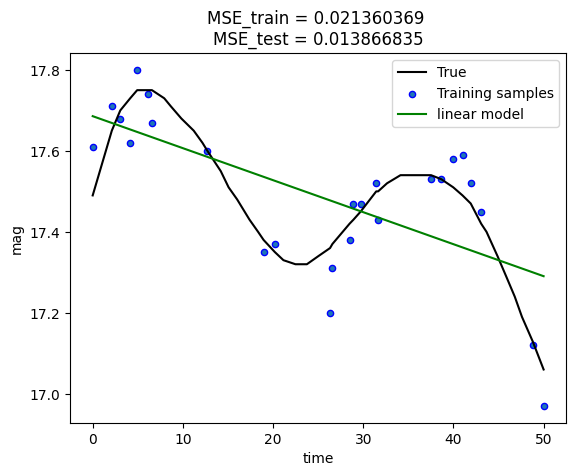

MSE_train:  0.021360368614867467
MSE_test:  0.013866834930611876


In [830]:
# Reshape X_train to a 2D array
X_train_reshaped = X_train[:, np.newaxis]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_reshaped, Y_train)

# Make predictions using the testing set
Y_pred_train = regr.predict(X_train[:,np.newaxis])
Y_pred_test = regr.predict(X_test[:,np.newaxis])


# The mean squared error
MSE_train = mean_squared_error(Y_train, Y_pred_train)
MSE_test = mean_squared_error(Y_test, Y_pred_test)

# Plot outputs
plt.plot(X_test,Y_test, color='k', label="True")
plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Training samples")
plt.plot(X_test, Y_pred_test, color='g', label="linear model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("MSE_train = {:.8} \nMSE_test = {:.8}".format(MSE_train,MSE_test))
plt.show()

print('MSE_train: ',MSE_train)
print('MSE_test: ',MSE_test)

#### **Polynomial Regression**

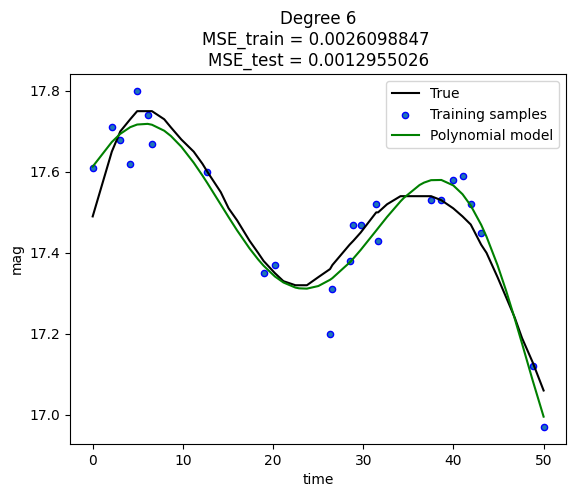

MSE_train:  0.002609884681315214
MSE_test:  0.0012955025841861457


In [831]:
# DATA_PATH_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'
degrees = list(range(1, 16))

best_model, best_degree, best_MSE_test, best_MSE_train, best_y_pred_test,best_y_pred_train,MSE_list_test = get_best_degree_to_polynomial_model(X_train, Y_train, degrees)

plt.plot(X_test, Y_test, color='k', label="True")
plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Training samples")
plt.plot(X_test, best_y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        best_degree, best_MSE_train, best_MSE_test))
plt.show()


print('MSE_train: ',best_MSE_train)
print('MSE_test: ',best_MSE_test)

#### **Splines (B-spline)**

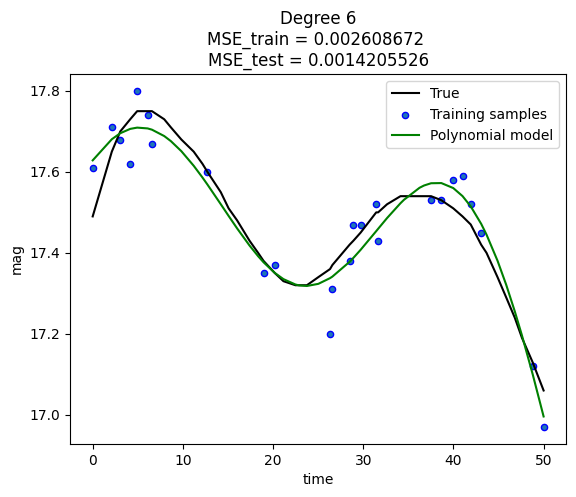

MSE_train:  0.0026086720096811828
MSE_test:  0.0014205526372029049


In [832]:
degrees = list(range(1, 16))

best_model, best_degree, best_MSE_test, best_MSE_train, best_y_pred_test, best_y_pred_train, MSE_list_test = get_best_degree_to_spline_model(X_train, Y_train, degrees)

# Plot outputs
plt.plot(X_test, Y_test, color='k', label="True")
plt.scatter(X_train, Y_train, edgecolor='b', s=20, label="Training samples")
plt.plot(X_test, best_y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        best_degree, best_MSE_train, best_MSE_test))
plt.show()


print('MSE_train: ',best_MSE_train)
print('MSE_test: ',best_MSE_test)

<function matplotlib.pyplot.show(close=None, block=None)>

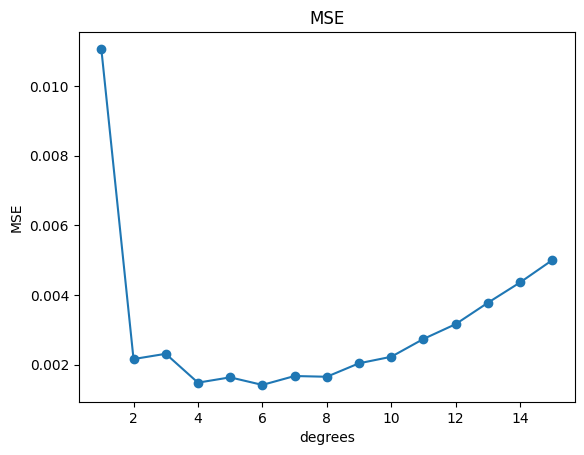

In [833]:
#plot all MSE
plt.plot(degrees, MSE_list_test, marker = 'o', linestyle= '-')
plt.xlabel('degrees')
plt.ylabel('MSE')
plt.title('MSE')
plt.show

#### **Fourier**

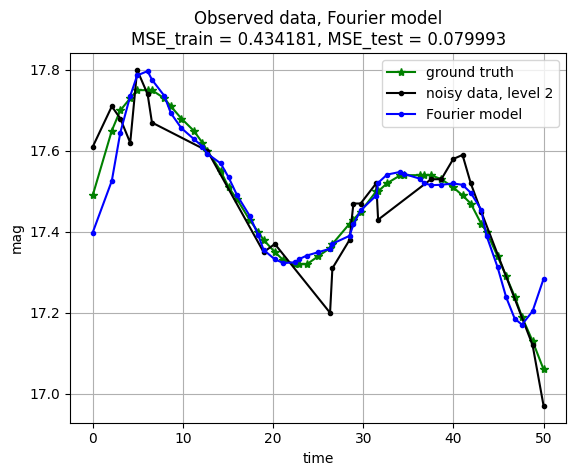

MSE for training set: 0.4341807027160634
MSE for testing set: 0.07999257348341401


In [834]:
# Normalize data
Y_train_normalized = (Y_train - np.mean(Y_train)) / np.std(Y_train)
Y_test_normalized = (Y_test - np.mean(Y_test)) / np.std(Y_test)

# Compute Fourier coefficients para los datos de entrenamiento normalizados
y_fft = np.fft.fft(Y_train_normalized)
freqs_train = np.fft.fftfreq(len(Y_train_normalized))

# Filter out high frequencies en los datos de entrenamiento
y_fft[np.abs(freqs_train) > 0.1] = 0

# Reconstruct signal usando inverse FFT para los datos de entrenamiento
f_train = np.fft.ifft(y_fft).real

# Calculate MSE para conjunto de entrenamiento
MSE_train = np.mean((f_train - Y_train_normalized) ** 2)

# Compute Fourier coefficients para los datos de prueba normalizados
y_test_fft = np.fft.fft(Y_test_normalized)
freqs_test = np.fft.fftfreq(len(Y_test_normalized))

# Filter out high frequencies en los datos de prueba usando las frecuencias de prueba
y_test_fft[np.abs(freqs_test) > 0.1] = 0

# Reconstruct signal usando inverse FFT para los datos de prueba
f_test = np.fft.ifft(y_test_fft).real

# Calculate MSE para conjunto de prueba
MSE_test = np.mean((f_test - Y_test_normalized) ** 2)

# Undo normalization of the reconstructed signal to training and test data
f_train = f_train * np.std(Y_train) + np.mean(Y_train)
f_test = f_test * np.std(Y_test) + np.mean(Y_test)

# MSE visualization and calculation
plt.figure()
plt.plot(X_test, Y_test, '*-g', label='ground truth')  # ground truth
plt.plot(X_train, Y_train, '.-k', label='noisy data, level 2')  # noisy data, level 3
plt.plot(X_test, f_test, '.-b', label='Fourier model')  # Fourier model
plt.legend()
plt.xlabel('time')
plt.ylabel('mag')
plt.title('Observed data, Fourier model\nMSE_train = {:f}, MSE_test = {:f}'.format(MSE_train.real, MSE_test.real))
plt.grid(True)
plt.show()

# Printing the MSE values
print("MSE for training set:", MSE_train.real)
print("MSE for testing set:", MSE_test.real)


#### **Table: Dataset: DS-5-1-GAP-5-1-N-3**
| Regression                | MSE training          | MSE Testing (ground truth) |
|---------------------------|-----------------------|----------------------------|
| Linear                    |0.021360368614867467   |0.013866834930611876        |
| Polynomial (degree = 6)   |0.002609884681315214   |0.0012955025841861457       | 
| Splines (degree = 6)      |0.0026086720096811828  |0.0014205526372029049       |
| Fourier                   |0.4341807027160634     |0.07999257348341401         |


## **Activity2:  Use 100 realizations per level of noise**

# **Data: DS-5-1-GAP-1-1-N-1**

In [835]:
# Load data
X_test = df_true[0].to_numpy()
Y_test = df_true[1].to_numpy()

X_train = df_noise1[0].to_numpy()
Y_train = df_noise1[1].to_numpy()


print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

(50,)
(50,)
(45,)
(45,)


#### **Polynomial Regression**

In [836]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
X = df_noise1[0]  #time
x = X.to_numpy()[:, np.newaxis]

Y = df_noise1.iloc[:,1:101]
y = Y.to_numpy()

#true is test
X_test = df_true[0].to_numpy()[:,np.newaxis]
Y_test = df_true[1].to_numpy()[:, np.newaxis]

degrees = list(range(1,20))

mean_bias = np.zeros(len(degrees))
mean_variance = np.zeros(len(degrees))

for j, degree in enumerate(degrees):
    bias = []
    y_pred_all = []

    for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        # create model
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        # training 
        model.fit(x, y_i)
        
        y_pred_all.append(model.predict(X_test))

        bias.append(abs(Y_test - y_pred_all[i]))

    # bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)

    # variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)

print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

Mean Bias:
[0.1046119  0.10361983 0.08780442 0.03847091 0.01668811 0.0102933
 0.00898785 0.00737389 0.00669004 0.01615585 0.01651086 0.01407579
 0.01633646 0.0263673  0.03827158 0.05005268 0.08763278 0.09121493
 0.09245241]

Mean Variance:
[0.00118132 0.00147208 0.00171471 0.00189878 0.00203802 0.00223529
 0.00238363 0.00254565 0.00394676 0.0026084  0.00242827 0.00238885
 0.00235898 0.00234475 0.00243909 0.00241474 0.00212611 0.00210574
 0.0020848 ]


<function matplotlib.pyplot.show(close=None, block=None)>

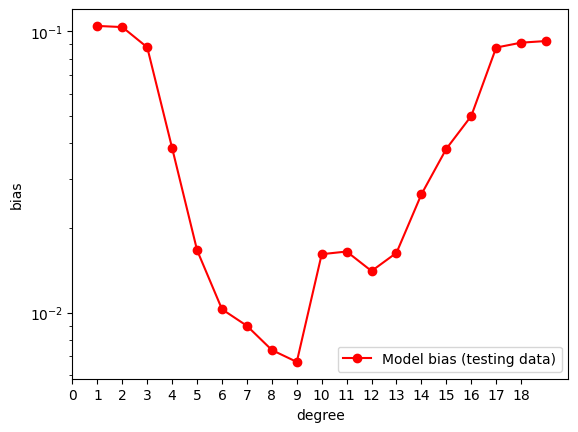

In [837]:
plt.xlabel('degree')
plt.ylabel('bias')
plt.plot(degrees, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

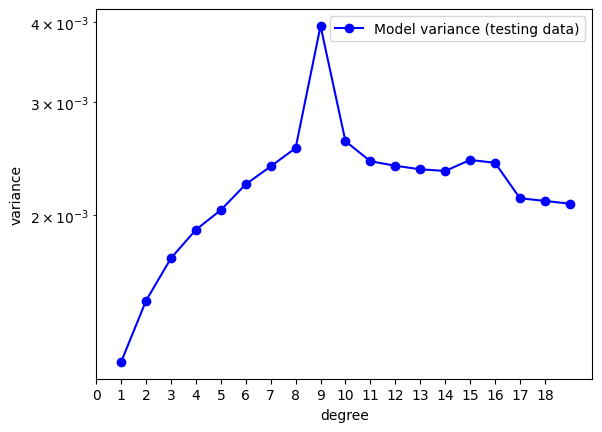

In [838]:
plt.xlabel('degree')
plt.ylabel('variance')
plt.plot(degrees, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

In [839]:
best_degree = degrees[np.argmin(mean_bias)]
best_degree

9

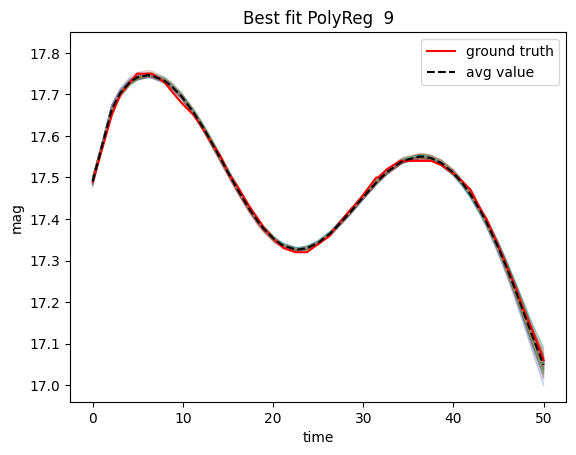

bias:  0.006690036291529672
variance 0.003946759748134829


In [840]:
plt.title( f'Best fit PolyReg  {best_degree}')
plt.ylim(Y_test.min() - 0.1, Y_test.max() + 0.1)


MSE_list_test = []
MSE_list_train =[]
y_pred_all = []

for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        # create model
        model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
        # training 
        model.fit(x, y_i)
        
        #Testing
        y_pred_train = model.predict(x) 
        y_pred_test = model.predict(X_test)

        MSE_train = mean_squared_error(y_i,y_pred_train)
        MSE_test = mean_squared_error(Y_test,y_pred_test)

        MSE_list_test.append(MSE_test)
        MSE_list_train.append(MSE_train)
                        
        y_pred_all.append(y_pred_test)
        plt.plot(X_test,y_pred_test,linewidth = 1, alpha = 0.3)

pred_mean = np.mean(y_pred_all, axis=0)
pred_variance = np.std(y_pred_all, axis=0)



plt.plot(X_test, Y_test, 'r', label = 'ground truth')

plt.plot(X_test, pred_mean, '--k', label = 'avg value')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

print('bias: ', mean_bias[best_degree - 1])
print('variance', mean_variance[best_degree - 1])

<function matplotlib.pyplot.show(close=None, block=None)>

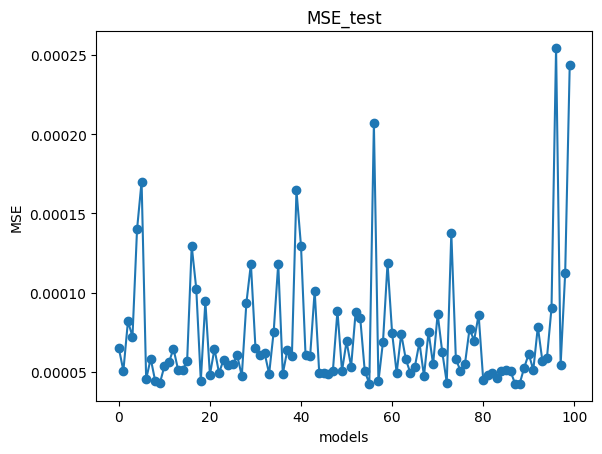

In [841]:
#plot all MSE
plt.plot(range(0,100), MSE_list_test, marker = 'o', linestyle= '-')
plt.xlabel('models')
plt.ylabel('MSE')
plt.title('MSE_test')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

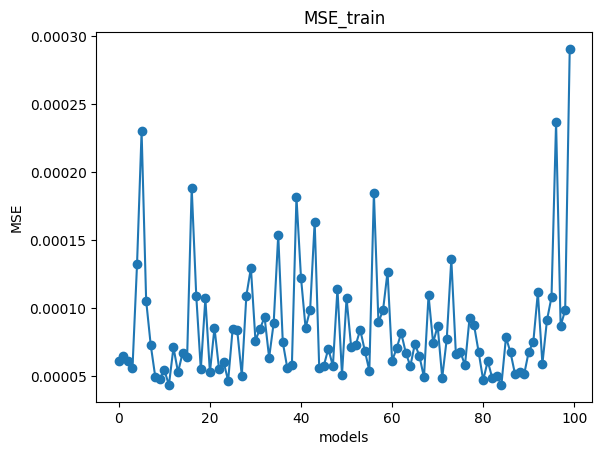

In [842]:
#plot all MSE
plt.plot(range(0,100), MSE_list_train, marker = 'o', linestyle= '-')
plt.xlabel('models')
plt.ylabel('MSE')
plt.title('MSE_train')
plt.show

In [843]:
MSE_train = min(MSE_list_train)
print('MSE_train: ',MSE_train)
print('model #',MSE_list_train.index(MSE_train))

MSE_test = min(MSE_list_test)
print('MSE_test: ',MSE_test)
print('model #',MSE_list_test.index(MSE_test))

MSE_train:  4.377425546976726e-05
model # 11
MSE_test:  4.248859783023113e-05
model # 88


#### **Splines (B-spline)**

In [844]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'

Y = df_noise1.iloc[:,1:101]
y = Y.to_numpy()

degrees = list(range(1,20))

mean_bias = np.zeros(len(degrees))
mean_variance = np.zeros(len(degrees))

for j, degree in enumerate(degrees):
    bias = []
    y_pred_all = []

    for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        #create model
        model = make_pipeline(SplineTransformer(n_knots=4, degree=degree), Ridge(alpha=1e-3))
        #training
        model.fit(X_train[:,np.newaxis], y_i)

        #predictions
        Y_pred_train = model.predict(X_train[:,np.newaxis])
        Y_pred_test = model.predict (X_test)

        y_pred_all.append(model.predict(X_test))

        bias.append(abs(Y_test - y_pred_all[i]))

    # bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)

    # variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)

print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

Mean Bias:
[0.08237244 0.03753138 0.01947464 0.02256899 0.01156363 0.01928863
 0.0150147  0.02209184 0.02341411 0.02802274 0.03148421 0.03548916
 0.03972975 0.04398461 0.04858668 0.05308472 0.0573883  0.06131321
 0.0648641 ]

Mean Variance:
[0.0017379  0.00192881 0.00200077 0.00195926 0.00199313 0.0019467
 0.00194404 0.00191057 0.00188872 0.00186714 0.00184289 0.00182251
 0.00180042 0.00178091 0.00176207 0.0017452  0.00172973 0.00171575
 0.00170293]


<function matplotlib.pyplot.show(close=None, block=None)>

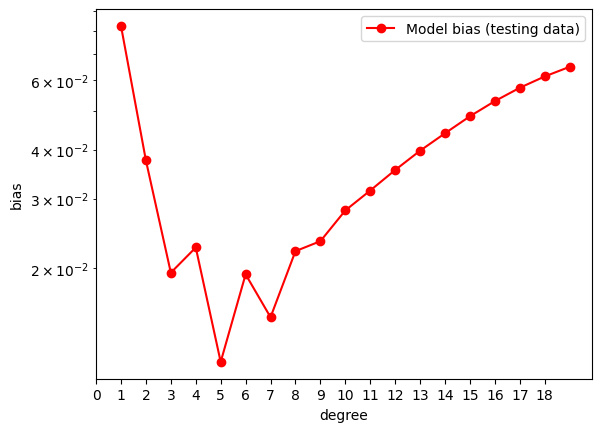

In [845]:
plt.xlabel('degree')
plt.ylabel('bias')
plt.plot(degrees, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

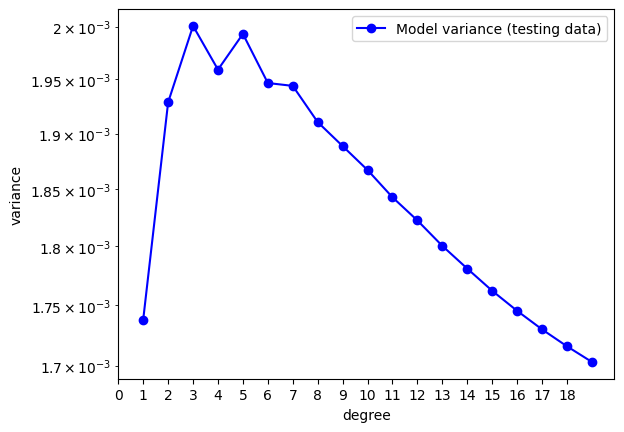

In [846]:
plt.xlabel('degree')
plt.ylabel('variance')
plt.plot(degrees, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

In [847]:
best_degree = degrees[np.argmin(mean_bias)]
best_degree

5

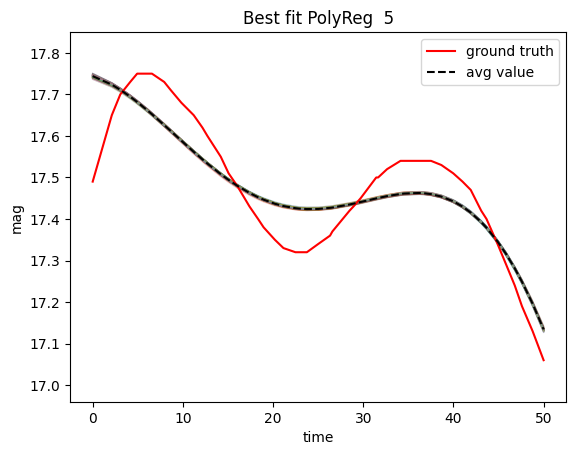

bias:  0.011563634204581886
variance 0.001993125121183679


In [848]:
plt.title( f'Best fit PolyReg  {best_degree}')
plt.ylim(Y_test.min() - 0.1, Y_test.max() + 0.1)

y_pred_all = []

MSE_list_train = []
MSE_list_test = []

for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        #create model
        model = make_pipeline(SplineTransformer(n_knots=4, degree=degree), Ridge(alpha=1e-3))
        #training
        model.fit(X_train[:,np.newaxis], y_i)

        #predictions
        Y_pred_train = model.predict(X_train[:,np.newaxis])
        Y_pred_test = model.predict (X_test)

        #MSE
        MSE_train = mean_squared_error(Y_train, Y_pred_train)
        MSE_test = mean_squared_error(Y_test, Y_pred_test)
        
        MSE_list_train.append(MSE_train)
        MSE_list_test.append(MSE_test)

        y_pred_all.append(Y_pred_test)
        plt.plot(X_test,Y_pred_test,linewidth = 1, alpha = 0.3)

pred_mean = np.mean(y_pred_all, axis=0)
pred_variance = np.std(y_pred_all, axis=0)



plt.plot(X_test, Y_test, 'r', label = 'ground truth')

plt.plot(X_test, pred_mean, '--k', label = 'avg value')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

print('bias: ', mean_bias[best_degree - 1])
print('variance', mean_variance[best_degree - 1])

<function matplotlib.pyplot.show(close=None, block=None)>

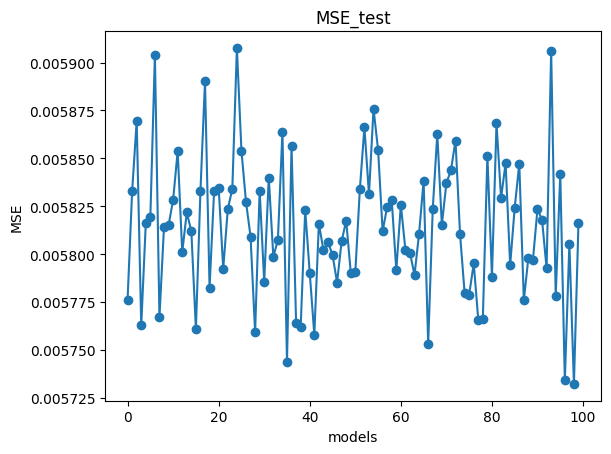

In [849]:
#plot all MSE
plt.plot(range(0,100), MSE_list_test, marker = 'o', linestyle= '-')
plt.xlabel('models')
plt.ylabel('MSE')
plt.title('MSE_test')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

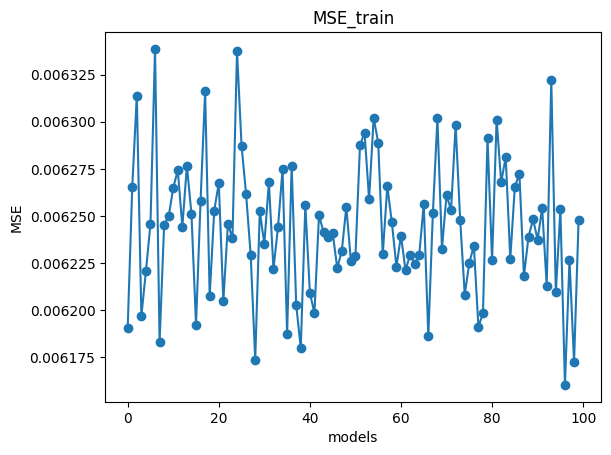

In [850]:
#plot all MSE
plt.plot(range(0,100), MSE_list_train, marker = 'o', linestyle= '-')
plt.xlabel('models')
plt.ylabel('MSE')
plt.title('MSE_train')
plt.show

In [852]:
MSE_train = np.mean(MSE_list_train)
print('MSE_train: ',MSE_train)
# print('model #',MSE_list_train.index(MSE_train))

MSE_test = np.mean(MSE_list_test)
print('MSE_test: ',MSE_test)
# print('model #',MSE_list_test.index(MSE_test))

MSE_train:  0.006243942580135314
MSE_test:  0.005814183614339369


### **Table: Dataset: DS-5-1-GAP-1-1-N-1**
| Regression                | MSE training          | MSE Testing (ground truth) | Bias                       | Variance                   |
|---------------------------|-----------------------|----------------------------|----------------------------|----------------------------|
| Polynomial (degree = 9)   |4.377425546976726e-05  |4.248859783023113e-05       |0.006690036291529672        |0.003946759748134829        |
| Splines (degree = 5)      |0.006160232511370162   |0.005732213767849366        | 0.011563634204581886       |0.001993125121183679        |

# **Data: DS-5-1-GAP-5-1-N-3**

In [ ]:
# Load data
X_test = df_true[0].to_numpy()
Y_test = df_true[1].to_numpy()

X_train = df_noise2[0].to_numpy()
Y_train = df_noise2[1].to_numpy()


print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

#### **Plynomial regression**

In [ ]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
X = df_noise2[0]  #time
x = X.to_numpy()[:, np.newaxis]

Y = df_noise2.iloc[:,1:101]
y = Y.to_numpy()

#true is test
X_test = df_true[0].to_numpy()[:,np.newaxis]
Y_test = df_true[1].to_numpy()[:, np.newaxis]

degrees = list(range(1,20))

mean_bias = np.zeros(len(degrees))
mean_variance = np.zeros(len(degrees))

for j, degree in enumerate(degrees):
    bias = []
    y_pred_all = []

    for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        # create model
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        # training 
        model.fit(x, y_i)
        
        y_pred_all.append(model.predict(X_test))

        bias.append(abs(Y_test - y_pred_all[i]))

    # bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)

    # variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)

print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

In [ ]:
plt.xlabel('degree')
plt.ylabel('bias')
plt.plot(degrees, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

In [ ]:
plt.xlabel('degree')
plt.ylabel('variance')
plt.plot(degrees, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

In [ ]:
best_degree = degrees[np.argmin(mean_bias)]
best_degree

In [ ]:
plt.title( f'Best fit PolyReg  {best_degree}')
plt.ylim(Y_test.min() - 0.1, Y_test.max() + 0.1)


MSE_list_test = []
MSE_list_train =[]
y_pred_all = []

for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        # create model
        model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
        # training 
        model.fit(x, y_i)
        
        #Testing
        y_pred_train = model.predict(x) 
        y_pred_test = model.predict(X_test)

        MSE_train = mean_squared_error(y_i,y_pred_train)
        MSE_test = mean_squared_error(Y_test,y_pred_test)

        MSE_list_test.append(MSE_test)
        MSE_list_train.append(MSE_train)
                        
        y_pred_all.append(y_pred_test)
        plt.plot(X_test,y_pred_test,linewidth = 1, alpha = 0.3)

pred_mean = np.mean(y_pred_all, axis=0)
pred_variance = np.std(y_pred_all, axis=0)



plt.plot(X_test, Y_test, 'r', label = 'ground truth')

plt.plot(X_test, pred_mean, '--k', label = 'avg value')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

print('bias: ', mean_bias[best_degree - 1])
print('variance', mean_variance[best_degree - 1])

In [ ]:
#plot all MSE
plt.plot(range(0,100), MSE_list_test, marker = 'o', linestyle= '-')
plt.xlabel('models')
plt.ylabel('MSE')
plt.title('MSE_test')
plt.show

In [ ]:
#plot all MSE
plt.plot(range(0,100), MSE_list_train, marker = 'o', linestyle= '-')
plt.xlabel('models')
plt.ylabel('MSE')
plt.title('MSE_train')
plt.show

In [ ]:
MSE_train = min(MSE_list_train)
print('MSE_train: ',MSE_train)
print('model #',MSE_list_train.index(MSE_train))

MSE_test = min(MSE_list_test)
print('MSE_test: ',MSE_test)
print('model #',MSE_list_test.index(MSE_test))

#### **Splines (B-spline)**

In [ ]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'

Y = df_noise2.iloc[:,1:101]
y = Y.to_numpy()

degrees = list(range(1,20))

mean_bias = np.zeros(len(degrees))
mean_variance = np.zeros(len(degrees))

for j, degree in enumerate(degrees):
    bias = []
    y_pred_all = []

    for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        #create model
        model = make_pipeline(SplineTransformer(n_knots=4, degree=degree), Ridge(alpha=1e-3))
        #training
        model.fit(X_train[:,np.newaxis], y_i)

        #predictions
        Y_pred_train = model.predict(X_train[:,np.newaxis])
        Y_pred_test = model.predict (X_test)

        y_pred_all.append(model.predict(X_test))

        bias.append(abs(Y_test - y_pred_all[i]))

    # bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)

    # variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)

print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

In [ ]:
plt.xlabel('degree')
plt.ylabel('bias')
plt.plot(degrees, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

In [ ]:
plt.xlabel('degree')
plt.ylabel('variance')
plt.plot(degrees, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

In [ ]:
best_degree = degrees[np.argmin(mean_bias)]
best_degree

In [ ]:
plt.title( f'Best fit PolyReg  {best_degree}')
plt.ylim(Y_test.min() - 0.1, Y_test.max() + 0.1)

y_pred_all = []

MSE_list_train = []
MSE_list_test = []

for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        #create model
        model = make_pipeline(SplineTransformer(n_knots=4, degree=degree), Ridge(alpha=1e-3))
        #training
        model.fit(X_train[:,np.newaxis], y_i)

        #predictions
        Y_pred_train = model.predict(X_train[:,np.newaxis])
        Y_pred_test = model.predict (X_test)

        #MSE
        MSE_train = mean_squared_error(Y_train, Y_pred_train)
        MSE_test = mean_squared_error(Y_test, Y_pred_test)
        
        MSE_list_train.append(MSE_train)
        MSE_list_test.append(MSE_test)

        y_pred_all.append(Y_pred_test)
        plt.plot(X_test,Y_pred_test,linewidth = 1, alpha = 0.3)

pred_mean = np.mean(y_pred_all, axis=0)
pred_variance = np.std(y_pred_all, axis=0)



plt.plot(X_test, Y_test, 'r', label = 'ground truth')

plt.plot(X_test, pred_mean, '--k', label = 'avg value')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

print('bias: ', mean_bias[best_degree - 1])
print('variance', mean_variance[best_degree - 1])

In [ ]:
#plot all MSE
plt.plot(range(0,100), MSE_list_test, marker = 'o', linestyle= '-')
plt.xlabel('models')
plt.ylabel('MSE')
plt.title('MSE_test')
plt.show

In [ ]:
#plot all MSE
plt.plot(range(0,100), MSE_list_train, marker = 'o', linestyle= '-')
plt.xlabel('models')
plt.ylabel('MSE')
plt.title('MSE_train')
plt.show

In [ ]:
MSE_train = min(MSE_list_train)
print('MSE_train: ',MSE_train)
print('model #',MSE_list_train.index(MSE_train))

MSE_test = min(MSE_list_test)
print('MSE_test: ',MSE_test)
print('model #',MSE_list_test.index(MSE_test))

#### **Table: Dataset: DS-5-1-GAP-5-1-N-3**
| Regression                | MSE training          | MSE Testing (ground truth) | Bias                       | Variance                   |
|---------------------------|-----------------------|----------------------------|----------------------------|----------------------------|
| Polynomial (degree = 5)   |0.002306499332014096   |0.0006206108024235141       |0.036434619162285936        |0.04029860246793506         |
| Splines (degree = 5)      |0.008783637380957643   |0.006316750783461628        |0.03327818833873526         |0.03837005736971363         |
